# **Boeing 747 lateral model LQR controller**

The complete lateral model of a Boeing 747 is
\begin{align}
    &\dot{x}(t) = Ax(t) + Bu(t) \\
    &y(t) = Cx(t) + Du(t)
\end{align}
where
\begin{equation}
A = 
    \begin{bmatrix}
        -10 & 0 & 0 & 0 & 0 & 0 \\
        0.0729 & -0.0558 & -0.997 & 0.0802 & 0.0415 & 0 \\
        -4.75 & 0.598 & -0.115 & -0.0318 & 0 & 0 \\
        1.53 & -3.05 & 0.388 & -0.465 & 0 & 0 \\
        0 & 0 & 0.0805 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 & 0 & -0.3333 \\
    \end{bmatrix}
    , \; B =
    \begin{bmatrix}
        1\\ 0\\ 0\\ 0\\ 0\\ 0\\
    \end{bmatrix}
\end{equation}
and
\begin{equation}
    \begin{bmatrix}
        0 & 0 & 1 & 0 & 0 & -0.3333
    \end{bmatrix}
    , \; D=0
\end{equation}

Minimize the sum of the energy of the output y and the energy of the control u. The main effort is to minimize the energy of y which is supposed to be zero in a steady state condition. So we put a weight $q = 9.527 > 1$ on the energy of y. The problem now is as follows.

\begin{align}
    &u^* := argmin_{u:[0,\infty) \to \mathbb{R}} J(u) := \int_0^\infty [qy(t)^Ty(t) + u(t)^2] dt \\
    &\text{subject to}\\
    &\dot{x}(t) = Ax(t) + Bu(t), \; t \in [t_0, \infty) \\
    &y(t) = Cx(t) + Du(t), \; t \in [t_0, \infty) \\
    &x(t_0) = x_0
\end{align}

**Tasks:**

1. Find an optimal policy for the LQR problem by solving ARE using Python or Matlab functions.
2. Plot trajectories of $y(t)$ and $u(t)$.
3. In the answer, please include your Python or Matlab codes.

## LQR controller in Python

We use Python because of:
- Totally open source environment
- More suitable to research

In [1]:
import numpy as np
import torch
import scipy.linalg
 
def LQR(A,B,Q,R):
    """Solve the continuous time lqr controller.

    dx/dt = A x + B u

    cost = integral x.T*Q*x + u.T*R*u
    """
    #ref Bertsekas, p.151

    #first, try to solve the ricatti equation
    X = np.matrix(scipy.linalg.solve_continuous_are(A, B, Q, R))

    #compute the LQR gain
    K = np.matrix(scipy.linalg.inv(R)*(B.T*X))

    eigVals, eigVecs = scipy.linalg.eig(A-B*K)

    return K, X, eigVals

## System definition

We define the system with matrices (with numpy first to solve with scipy)

In [32]:
# Build matrices
A = np.matrix([[-10, 0, 0, 0, 0, 0],
              [0.0729, -0.0558, -0.997, 0.0802, 0.0415, 0],
              [-4.75, 0.598, -0.115, -0.0318, 0, 0],
              [1.53, -3.05, 0.388, -0.465, 0, 0],
              [0, 0, 0.0805, 1, 0, 0],
              [0, 0, 1, 0, 0, -0.3333]])
B = np.matrix([[1], [0], [0], [0], [0], [0]])
C = np.matrix([0, 0, 1, 0, 0, -0.3333])
D = 0*np.eye(1)
print('A:\n', A)
print('B:\n', B)
print('C:\n', C)
print('D:\n', D)

A:
 [[-10.       0.       0.       0.       0.       0.    ]
 [  0.0729  -0.0558  -0.997    0.0802   0.0415   0.    ]
 [ -4.75     0.598   -0.115   -0.0318   0.       0.    ]
 [  1.53    -3.05     0.388   -0.465    0.       0.    ]
 [  0.       0.       0.0805   1.       0.       0.    ]
 [  0.       0.       1.       0.       0.      -0.3333]]
B:
 [[1]
 [0]
 [0]
 [0]
 [0]
 [0]]
C:
 [[ 0.      0.      1.      0.      0.     -0.3333]]
D:
 [[0.]]


We can rewrite $Q$ as: $C^T q C$ due to the cost function where $q = 9.527$ while $R = 1$

In [49]:
# Choose Q and R matrices for control (trial and error)
q = 9.527
Q = C.T*q*C
R = np.eye(1)
print('Q:\n', Q)
print('R:\n', R)

Q:
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          9.527       0.          0.         -3.1753491 ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -3.1753491   0.          0.          1.05834386]]
R:
 [[1.]]


In [50]:
K, X, eigVals = LQR(A, B, Q, R)
print(('K = {}\n').format(K))
print(('X = {}\n').format(X))
print(('Eigenvalues = {}\n').format(eigVals))

K = [[ 1.05951967 -0.19104882 -2.31972318  0.09916995  0.03704914  0.48581648]]

X = [[ 1.05951967 -0.19104882 -2.31972318  0.09916995  0.03704914  0.48581648]
 [-0.19104882  3.12369252  0.1269728  -0.03823677  0.01653782 -0.33933894]
 [-2.31972318  0.1269728   5.54522022 -0.20196413 -0.07828093 -1.22398629]
 [ 0.09916995 -0.03823677 -0.20196413  0.05937891  0.02917266 -0.16625979]
 [ 0.03704914  0.01653782 -0.07828093  0.02917266  0.01501061 -0.09625457]
 [ 0.48581648 -0.33933894 -1.22398629 -0.16625979 -0.09625457  1.23361266]]

Eigenvalues = [-9.89079977e+00+0.j       -1.10623057e+00+0.j
 -2.79315485e-01+0.628216j -2.79315485e-01-0.628216j
 -5.06061786e-03+0.j       -4.67897741e-01+0.j      ]



In [114]:

class ControlledBoeing747():
    def __init__(self, A, B, C, D, dt = 0.02):
        """ Simulate the system by calculating the state 
        variation with: x_{t+1} = x_t + dx*dt
        where dx = Ax + Bu and y = Cx +Du
        
        The variables are:
        dt: time step (i.e. 0.02s) to forward propagate the simulation
        x: current state
        A, B, C, D: matrices describing the dynamics
        """
        self.dt = dt # Time step, i.e. 0.02s
        self.A = A
        self.B = B
        self.C = C
        self.D = D
    
    # Simulate next step
    def step(self, u):
        dx = A*self.x + B*u
        self.x += dx*self.dt # x_{t+1} = x_t + dx*dt
        output = C*self.x + D*u
        return self.x, output
    
    # Reset to initial position
    def reset(self, x_initial= 
              np.matrix(np.random.uniform(-0.1, 0.1, size=6)).T):
        self.x = x_initial
        return self.x

In [116]:
model = ControlledBoeing747(A, B, C, D)
# Initial condition
x0 = np.matrix(np.random.uniform(-0.1, 0.1, size=6)).T
model.reset(x_initial=x0)

matrix([[ 0.03378645],
        [-0.02647147],
        [-0.04658674],
        [ 0.04932416],
        [-0.07232754],
        [ 0.04527723]])

In [135]:
# Input check
model.step(np.array([[1]]))

(matrix([[ 9.90457622e-02],
         [ 1.85531253e-02],
         [-1.94432582e-01],
         [ 8.10469231e-02],
         [-4.97862202e-02],
         [ 1.50279264e-04]]),
 matrix([[-0.19448267]]))

Now we can plug in the control input. The optimal control input is given by $u^*(t) = -K x$ where $K$ is the gain we have previously found and $x$ is the current state. 

In [218]:
# x is the state space, y is the output
x0 = np.matrix(np.random.uniform(-0.5, 0.5, size=6)).T
x = model.reset(x_initial=x0) # first state is the initial state

# Save trajectory for the graph
trajectory_state = []
trajectory_outputs = []
controls = []

# Control loop (each loop is 0.02s of simulation)
for i in range(1000):
    u = - K*x  # the control input is u* = -Kx
    x, y = model.step(u) # propagate
    trajectory_state.append(x)
    trajectory_outputs.append(y)
    controls.append(u)

### Output plot

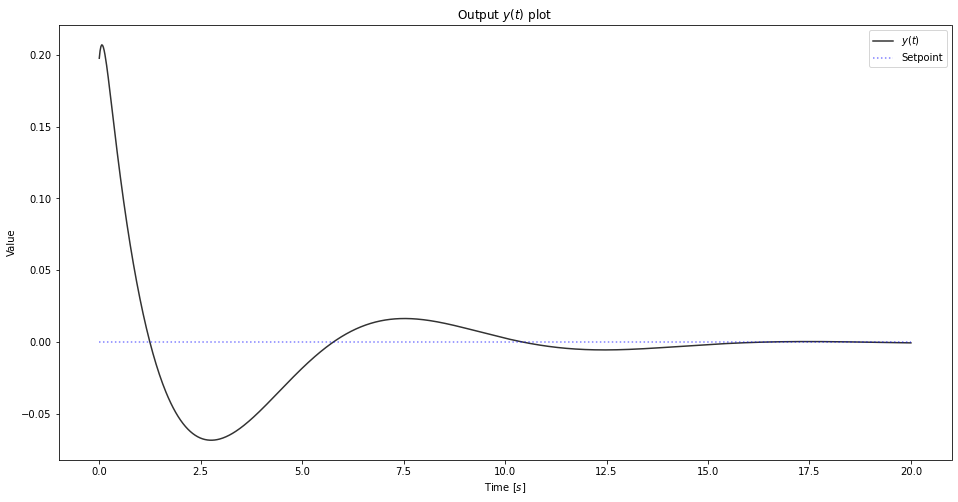

In [228]:
# Trajectory plotting
import matplotlib.pyplot as plt

tau = 0.02 # time of system update
tot_time = tau*len(trajectory_outputs)
t = np.linspace(0, tot_time, len(trajectory_outputs)) # time

y, u = [], []
for i in range(len(trajectory_outputs)):
    y.append(trajectory_outputs[i].item())
    u.append(controls[i].item())

fig, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(t, y, "k", alpha=.8, label=r'$y(t)$')
ax.plot([0, tot_time], [0, 0], ":b", alpha=.5, label=r'Setpoint')
ax.legend(loc='upper right')
ax.set_xlabel(r'Time [$s$]')
ax.set_ylabel(r'Value')
ax.set_title("Output $y(t)$ plot")
fig.savefig('images/boeing_output.jpg')

### Control input plot

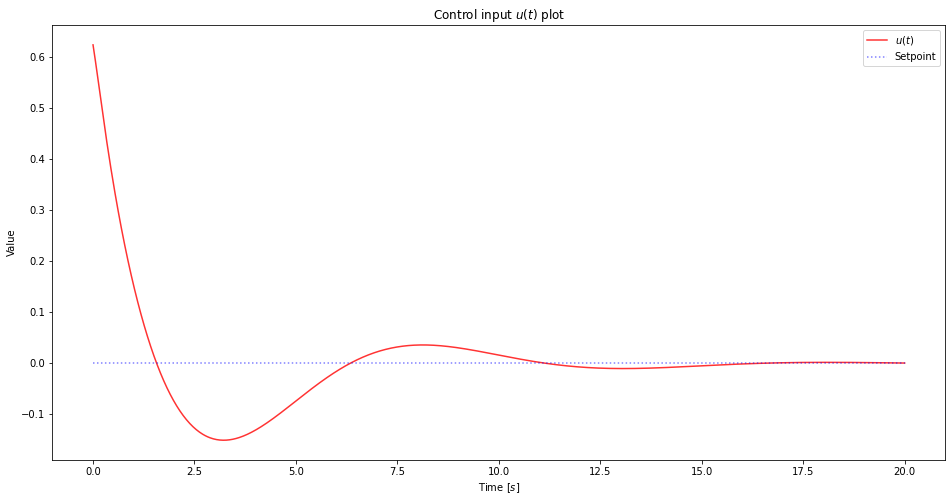

In [227]:
fig, ax = plt.subplots(1,1, figsize=(16, 8))
ax.plot(t, u, "r", alpha=.8,label=r'$u(t)$')
ax.plot([0, tot_time], [0, 0], ":b", alpha=.5, label=r'Setpoint')
ax.legend(loc='upper right')
ax.set_xlabel(r'Time [$s$]')
ax.set_ylabel(r'Value')
ax.set_title(r"Control input $u(t)$ plot")
fig.savefig('images/boeing_input.jpg')